In [48]:
# version with additional standardization (after splitting data into train/test)

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [49]:
# load and read dataset into dataframe
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [50]:
# load and read PCA dataset into dataframe
diabetes_PCA = pd.read_csv('/content/pcadiabetes_dataframe.csv')
diabetes_PCA.head()

,Principal Component 1,Principal Component 2
0,-0.949466,0.707299
1,0.380004,-1.836460
2,-2.580389,-0.943183
3,-0.960391,-1.790571
4,-2.243413,0.164973


In [51]:
# defining feature matrix and target vector
# features are taken from the PCA dataframe
X = diabetes_PCA
print(X)
# target vector taken from the original dataframe
y = diabetes_df['Diabetes_binary']
print(y)

       Principal Component 1  Principal Component 2
0                  -0.949466               0.707299
1                   0.380004              -1.836460
2                  -2.580389              -0.943183
3                  -0.960391              -1.790571
4                  -2.243413               0.164973
...                      ...                    ...
70687               1.136014               0.933611
70688               1.425173              -1.161351
70689               3.124058              -1.153756
70690               2.548052              -0.050061
70691               0.459510              -1.404234

[70692 rows x 2 columns]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70692, dtype: float64


In [52]:
# Splitting data into training and test datasets (75/25)
# setting random_state in order ot ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)


In [53]:
# Scale the features (check if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# cross-validation to find best k
from sklearn.model_selection import cross_val_score
k_values = [i for i in range(1,31)]
scores = []

# create KNN model based on each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [55]:
# find the best k value based on best score
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("Best K value based on Cross-validation: ", best_k)

Best K value based on Cross-validation:  30


In [56]:
# creating the KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [57]:
# predicting y values
y_pred = knn.predict(X_test)

In [58]:
# Evaluation of model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)
print('ROC AUC: ', roc_auc)

print()
report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", report)

Accuracy:  0.8081819725004243
Precision:  0.7961977186311787
Recall:  0.8287911342304648
F1 Score:  0.8121675531914894
ROC AUC:  0.8081668015433184

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      8830
         1.0       0.80      0.83      0.81      8843

    accuracy                           0.81     17673
   macro avg       0.81      0.81      0.81     17673
weighted avg       0.81      0.81      0.81     17673



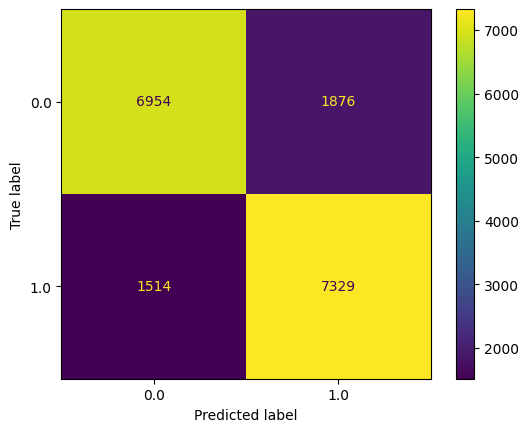

In [59]:
# visualizing confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [60]:
# hyperparameter tuning
# using GridSearch
param_grid = {'n_neighbors': k_values}

knn2 = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn2, param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

best_param = knn_grid_search.best_params_['n_neighbors']
best_score = knn_grid_search.best_score_

In [61]:
print("Best K value based on Grid Search: ", best_param)
print("Best score: ", best_score)

Best K value based on Grid Search:  30
Best score:  0.8073331647488221


In [65]:
# creating the KNN model based on tuned hyperparameter
knn3 = KNeighborsClassifier(n_neighbors=best_param)
# fitting the updated model
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [66]:
# predicting y values
y_pred2 = knn3.predict(X_test)

In [67]:
# Evaluation for updated model
accuracy = metrics.accuracy_score(y_test, y_pred2)
precision = metrics.precision_score(y_test, y_pred2)
recall = metrics.recall_score(y_test, y_pred2)
f1_score = metrics.f1_score(y_test, y_pred2)
roc_auc = metrics.roc_auc_score(y_test, y_pred2)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)
print('ROC AUC: ', roc_auc)
print()
report = metrics.classification_report(y_test, y_pred2)
print('Classification Report: \n', report)

Accuracy:  0.8081819725004243
Precision:  0.7961977186311787
Recall:  0.8287911342304648
F1 Score:  0.8121675531914894
ROC AUC:  0.8081668015433184

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      8830
         1.0       0.80      0.83      0.81      8843

    accuracy                           0.81     17673
   macro avg       0.81      0.81      0.81     17673
weighted avg       0.81      0.81      0.81     17673

